In [78]:
#Importing the important libraries i need
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from time import time

In [79]:
df = pd.read_csv("sabiu.csv")

In [80]:
df.shape

(100000, 9)

In [81]:
df.head()

,gender,age,hypertension,heartdisease,smokinghistory,bmi,HbA1clevel,bloodglucoselevel,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [82]:
df.cov()

,age,hypertension,heartdisease,bmi,HbA1clevel,bloodglucoselevel,diabetes
age,507.008078,1.488269,1.022470,50.420219,2.443449,101.444257,1.620178
hypertension,1.488269,0.069248,0.006209,0.257894,0.022804,0.904433,0.014518
heartdisease,1.022470,0.006209,0.037866,0.079035,0.014082,0.555027,0.009319
bmi,50.420219,0.257894,0.079035,44.046894,0.589763,24.656192,0.396751
HbA1clevel,2.443449,0.022804,0.014082,0.589763,1.146339,7.267066,0.119634
bloodglucoselevel,101.444257,0.904433,0.555027,24.656192,7.267066,1657.152341,4.763163
diabetes,1.620178,0.014518,0.009319,0.396751,0.119634,4.763163,0.077776


In [83]:
df.corr()

,age,hypertension,heartdisease,bmi,HbA1clevel,bloodglucoselevel,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heartdisease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1clevel,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
bloodglucoselevel,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<AxesSubplot:>

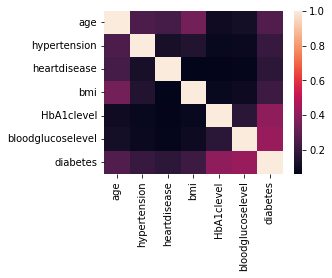

In [84]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr())

In [85]:
#Exploring the dataset to get some statistical information
df.describe()

,age,hypertension,heartdisease,bmi,HbA1clevel,bloodglucoselevel,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [86]:
#Converting dataset to categorical
df["gender"]=df["gender"].astype("category")
df["age"]=df["age"].astype("category")
df["hypertension"]=df["hypertension"].astype("category")
df["heartdisease"]=df["heartdisease"].astype("category")
df["smokinghistory"]=df["smokinghistory"].astype("category")
df["bmi"]=df["bmi"].astype("category")
df["HbA1clevel"]=df["HbA1clevel"].astype("category")
df["bloodglucoselevel"]=df["bloodglucoselevel"].astype("category")
df["diabetes"]=df["diabetes"].astype("category")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   gender             100000 non-null  category
 1   age                100000 non-null  category
 2   hypertension       100000 non-null  category
 3   heartdisease       100000 non-null  category
 4   smokinghistory     100000 non-null  category
 5   bmi                100000 non-null  category
 6   HbA1clevel         100000 non-null  category
 7   bloodglucoselevel  100000 non-null  category
 8   diabetes           100000 non-null  category
dtypes: category(9)
memory usage: 1.1 MB


In [88]:
#Checking for null values in my dataset
df.isnull().sum()

gender               0
age                  0
hypertension         0
heartdisease         0
smokinghistory       0
bmi                  0
HbA1clevel           0
bloodglucoselevel    0
diabetes             0
dtype: int64

In [89]:
#Statistics of Gender
df["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [90]:
#Statistics of Heart Disease
df["heartdisease"].value_counts()

0    96058
1     3942
Name: heartdisease, dtype: int64

In [91]:
#Statistics of Diabetes
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [92]:
#Statistics of Smoking History
df["smokinghistory"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smokinghistory, dtype: int64

In [93]:
#Statistics of Blood Glucose Level
df["bloodglucoselevel"].value_counts()

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: bloodglucoselevel, dtype: int64

In [94]:
LE = LabelEncoder() #creating an instance of label encoder

In [95]:
df.gender = LE.fit_transform(df.gender)

In [96]:
df.smokinghistory = LE.fit_transform(df.smokinghistory)

In [97]:
df.gender = LE.fit_transform(df.gender)

In [98]:
df.head()

,gender,age,hypertension,heartdisease,smokinghistory,bmi,HbA1clevel,bloodglucoselevel,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [99]:
x = df.iloc[:,:-1] #This mean I want all the columns except the last one which is the target column 
y = df.iloc[:, -1]# This time I want the target variable which is the last column

In [100]:
x.shape

(100000, 8)

In [101]:
y.shape

(100000,)

In [102]:
#Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=70)

In [103]:
y_train.shape

(90000,)

In [104]:
#Making object of the Random Forest Classifier for my required hyper parameters
clf = RandomForestClassifier(criterion = "gini", #the values of gini purity lies between 0 and 1
                            max_depth = 8, #Maximum depth of the tree as it grow
                            min_samples_split = 10, #minimum number of samples required to split node and bracnh of the tree
                            random_state = 5)

In [105]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [106]:
#Looking at the important feature since we have so many independent variables
clf.feature_importances_

array([0.00071861, 0.04926513, 0.02129214, 0.01113405, 0.00433797,
       0.02793494, 0.50321071, 0.38210645])

In [107]:
#looking at the importance of the variables from column view (in terms of percentage)
df.columns

Index(['gender', 'age', 'hypertension', 'heartdisease', 'smokinghistory',
       'bmi', 'HbA1clevel', 'bloodglucoselevel', 'diabetes'],
      dtype='object')

In [108]:
y_pred = clf.predict(x_test)

In [109]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
#This means all the values on the diagonal are correcly classified while the ones off diagonal are misclassified
confusion_matrix(y_test, y_pred)

array([[9154,    0],
       [ 288,  558]], dtype=int64)

In [111]:
#Accuracy of the model
accuracy_score(y_test, y_pred)

0.9712

In [112]:
#Doing a cross validation in percentage
cross_val_score(clf, x_train, y_train, cv =10)

array([0.97111111, 0.97355556, 0.97411111, 0.96977778, 0.97188889,
       0.972     , 0.97255556, 0.96933333, 0.97255556, 0.97255556])

In [113]:
#Printing the classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9442
           1       0.66      1.00      0.79       558

    accuracy                           0.97     10000
   macro avg       0.83      0.98      0.89     10000
weighted avg       0.98      0.97      0.97     10000



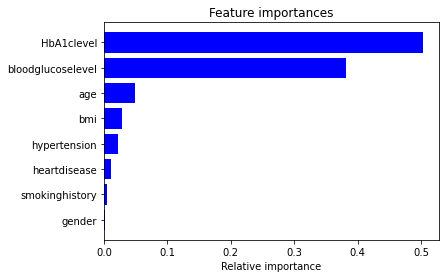

In [114]:
#Making a plot for feature importance of the model. This mean HbA1clevel is the most important feature in our
#classification model

features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [115]:
mean_squared_error(y_test, y_pred)

0.0288

In [116]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.16970562748477142